# =============================================================
# MILESTONE 3: Machine Learning Model Development and Optimization
# =============================================================

In [1]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "../data/processed/processed_data.csv"
df = pd.read_csv(url)

df.shape

(3333, 16)

# Features (X) and Target (y)

In [3]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Train/test split (80/20) with stratification

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before SMOTE:", np.bincount(y_train))

Before SMOTE: [2280  386]



# Apply SMOTE only to training set

In [5]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", np.bincount(y_train_resampled))

After SMOTE: [2280 2280]


# =============================================================
# LogisticRegression Model
# =============================================================

Logistic Regression Evaluation:
Accuracy : 0.8575712143928036
Precision: 0.50625
Recall   : 0.8350515463917526
F1-score : 0.6303501945525292
ROC-AUC  : 0.8702477844094773

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       570
           1       0.51      0.84      0.63        97

    accuracy                           0.86       667
   macro avg       0.74      0.85      0.77       667
weighted avg       0.90      0.86      0.87       667


Confusion Matrix:
 [[491  79]
 [ 16  81]]


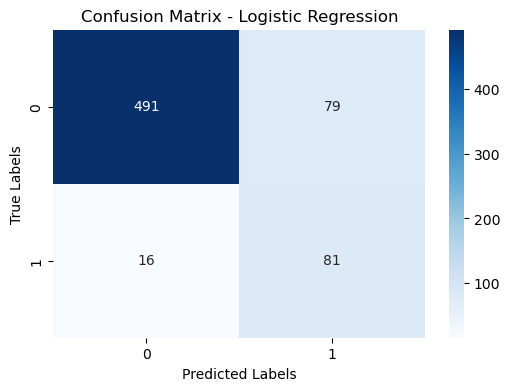

In [6]:
log_reg = LogisticRegression(max_iter=1000, solver="liblinear")
log_reg.fit(X_train_resampled, y_train_resampled)

y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_pred_prob))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# =============================================================
# DECISION TREE MODEL
# =============================================================

In [7]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

print("Decision Tree Evaluation:")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1-score :", f1_score(y_test, y_pred_dt))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_dt))

Decision Tree Evaluation:
Accuracy : 0.8980509745127436
Precision: 0.616
Recall   : 0.7938144329896907
F1-score : 0.6936936936936937
ROC-AUC  : 0.8548019533369505


# =============================================================
# RANDOM FOREST MODEL
# =============================================================

In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Evaluation:")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1-score :", f1_score(y_test, y_pred_rf))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_rf))

Random Forest Evaluation:
Accuracy : 0.9475262368815592
Precision: 0.8297872340425532
Recall   : 0.8041237113402062
F1-score : 0.8167539267015707
ROC-AUC  : 0.9252125158256467


# =============================================================
# XGBOOST MODEL
# =============================================================

In [9]:
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Evaluation:")
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1-score :", f1_score(y_test, y_pred_xgb))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_xgb))

d:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:57:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Evaluation:
Accuracy : 0.9580209895052474
Precision: 0.8791208791208791
Recall   : 0.8247422680412371
F1-score : 0.851063829787234
ROC-AUC  : 0.9251401700126606


# =============================================================
# MODEL COMPARISON
# =============================================================

In [10]:
comparison = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_prob)
    },
    {
        "Model": "Decision Tree",
        "Accuracy": accuracy_score(y_test, y_pred_dt),
        "Precision": precision_score(y_test, y_pred_dt),
        "Recall": recall_score(y_test, y_pred_dt),
        "F1-score": f1_score(y_test, y_pred_dt),
        "ROC-AUC": roc_auc_score(y_test, y_prob_dt)
    },
    {
        "Model": "Random Forest",
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf),
        "Recall": recall_score(y_test, y_pred_rf),
        "F1-score": f1_score(y_test, y_pred_rf),
        "ROC-AUC": roc_auc_score(y_test, y_prob_rf)
    },
    {
        "Model": "XGBoost",
        "Accuracy": accuracy_score(y_test, y_pred_xgb),
        "Precision": precision_score(y_test, y_pred_xgb),
        "Recall": recall_score(y_test, y_pred_xgb),
        "F1-score": f1_score(y_test, y_pred_xgb),
        "ROC-AUC": roc_auc_score(y_test, y_prob_xgb)
    }
])

print("\nModel Performance Comparison:")
print(comparison.sort_values(by="ROC-AUC", ascending=False).round(3))


Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
2        Random Forest     0.948      0.830   0.804     0.817    0.925
3              XGBoost     0.958      0.879   0.825     0.851    0.925
0  Logistic Regression     0.858      0.506   0.835     0.630    0.870
1        Decision Tree     0.898      0.616   0.794     0.694    0.855
